In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import requests
from matplotlib import pyplot as plt
from nba_api.stats.endpoints import playercareerstats

In [ ]:
from nba_api.stats import endpoints
from nba_api.stats.static import teams
# get_teams returns a list of 30 dictionaries, each an NBA team.
nba_teams = teams.get_teams()
print('Number of teams: {}'.format(len(nba_teams)))
nba_teams[:2]

In [ ]:
bucks = [team for team in nba_teams
         if team['abbreviation'] == 'MIL'][0]
#bucks
bucks_id = bucks['id']

In [ ]:
from nba_api.stats.static import players
# get_players returns a list of dictionaries, each representing a player.
nba_players = players.get_players()
print('Number of players fetched: {}'.format(len(nba_players)))
nba_players[:2]

Max points on season 2020: 49 on MAY 02, 2021, MIL vs. BKN
  SEASON_ID  Player_ID     Game_ID     GAME_DATE      MATCHUP WL  MIN  FGM  \
0     22020     203507  0022001062  MAY 15, 2021  MIL vs. MIA  W   34    6   
1     22020     203507  0022001048  MAY 13, 2021    MIL @ IND  W   35   14   
2     22020     203507  0022001038  MAY 11, 2021  MIL vs. ORL  W   32   11   
3     22020     203507  0022001029  MAY 10, 2021    MIL @ SAS  L   29   11   
4     22020     203507  0022001006  MAY 07, 2021  MIL vs. HOU  W   29    8   

   FGA  FG_PCT  ...  DREB  REB  AST  STL  BLK  TOV  PF  PTS  PLUS_MINUS  \
0   12   0.500  ...     9    9    4    0    1    1   1   15          19   
1   18   0.778  ...    12   15    6    1    0    1   1   40           1   
2   18   0.611  ...    10   12    5    3    0    2   5   27          14   
3   16   0.688  ...     3    3    4    0    0    0   4   28         -22   
4   11   0.727  ...    11   11    7    2    1    1   3   17           5   

   VIDEO_AVAILABLE  


<AxesSubplot:xlabel='MIN', ylabel='PTS'>

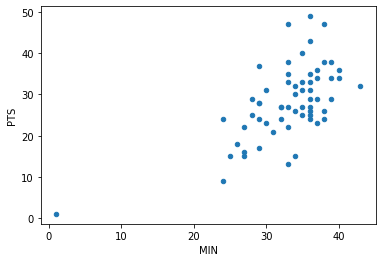

In [32]:
#GIANNIS
from nba_api.stats.endpoints import playercareerstats
from nba_api.stats.library.parameters import SeasonAll
from nba_api.stats.endpoints import playergamelog

Giannis = [player for player in nba_players
                   if player['full_name'] == 'Giannis Antetokounmpo'][0]
Giannis_id = Giannis['id']
Giannis
career = playercareerstats.PlayerCareerStats(player_id = Giannis_id)
career.get_data_frames()[0]

#SEASON 2020
game_gian = playergamelog.PlayerGameLog(player_id= Giannis_id, season = '2020')
df_gian_games_2020 = game_gian.get_data_frames()[0]


game_gian_all = playergamelog.PlayerGameLog(player_id=Giannis_id, season = SeasonAll.all)
df_gian_games_all = game_gian_all.get_data_frames()[0]


PTS = df_gian_games_2020.iloc[:,24]
GAME_D = df_gian_games_2020.iloc[:,3]
MATCH = df_gian_games_2020.iloc[:,4]


for i in range(len(df_gian_games_2020)):
    if (PTS[i] == max(PTS)):
        print("Max points on season 2020: " + str(max(PTS))+ " on " + str(GAME_D[i]) + ", " + str(MATCH[i]))
        
print(df_gian_games_2020.head())      
df_gian_games_2020.plot(x ='MIN', y='PTS', kind = 'scatter')


Max points on season 2021: 40 on OCT 27, 2021, MIL vs. MIN. Mean points: 27.636363636363637
   SEASON_ID  Player_ID     Game_ID     GAME_DATE      MATCHUP WL  MIN  FGM  \
0      22021     203507  0022100155  NOV 09, 2021    MIL @ PHI  W   36   12   
1      22021     203507  0022100142  NOV 07, 2021    MIL @ WAS  L   39   12   
2      22021     203507  0022100128  NOV 05, 2021  MIL vs. NYK  L   31    7   
3      22021     203507  0022100103  NOV 02, 2021    MIL @ DET  W   27    9   
4      22021     203507  0022100091  OCT 31, 2021  MIL vs. UTA  L   35   10   
5      22021     203507  0022100085  OCT 30, 2021  MIL vs. SAS  L   34   11   
6      22021     203507  0022100060  OCT 27, 2021  MIL vs. MIN  L   35   15   
7      22021     203507  0022100042  OCT 25, 2021    MIL @ IND  W   36   10   
8      22021     203507  0022100032  OCT 23, 2021    MIL @ SAS  W   30    7   
9      22021     203507  0022100015  OCT 21, 2021    MIL @ MIA  L   23    4   
10     22021     203507  0022100001  OC

<AxesSubplot:xlabel='GAME_DATE', ylabel='PTS'>

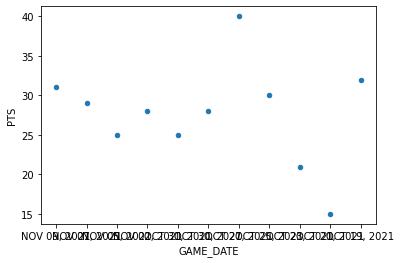

In [44]:
#SEASON 2021
from numpy import mean
game_gian = playergamelog.PlayerGameLog(player_id= Giannis_id, season = '2021')
df_gian_games_2021 = game_gian.get_data_frames()[0]


game_gian_all = playergamelog.PlayerGameLog(player_id=Giannis_id, season = SeasonAll.all)
df_gian_games_all = game_gian_all.get_data_frames()[0]


PTS = df_gian_games_2021.iloc[:,24]
GAME_D = df_gian_games_2021.iloc[:,3]
MATCH = df_gian_games_2021.iloc[:,4]

mean_points=mean(PTS)
for i in range(len(df_gian_games_2021)):
    if (PTS[i] == max(PTS)):
        print("Max points on season 2021: " + str(max(PTS))+ " on " + str(GAME_D[i]) + ", " + str(MATCH[i])+ ". Mean points: "+ str(mean_points))
        
        
print(df_gian_games_2021)      
df_gian_games_2021.plot(x ='GAME_DATE', y='PTS', kind = 'scatter')



In [45]:
data = endpoints.leagueleaders.LeagueLeaders() 
df = data.league_leaders.get_data_frame()
 
print(len(df))
print(df.head())
#print(df.columns.tolist())

#TOP5 scorers
max(df.loc[:,'PTS'])
df.iloc[0:5,:]



446
   PLAYER_ID  RANK                 PLAYER TEAM  GP  MIN  FGM  FGA  FG_PCT  \
0     201142     1           Kevin Durant  BKN  11  384  123  217   0.567   
1     203507     2  Giannis Antetokounmpo  MIL  11  357  109  215   0.507   
2    1629027     3             Trae Young  ATL  12  417  103  241   0.427   
3     201939     4          Stephen Curry  GSW  10  336   87  203   0.429   
4     201942     5          DeMar DeRozan  CHI  10  349   96  191   0.503   

   FG3M  ...  REB  AST  STL  BLK  TOV  PF  PTS  EFF  AST_TOV  STL_TOV  
0    21  ...   97   58    7    8   36  15  324  352     1.61     0.19  
1    14  ...  127   64   12   19   33  32  304  354     1.94     0.36  
2    25  ...   39  111   10    2   44  16  288  262     2.52     0.23  
3    52  ...   66   66   17    7   31  15  276  284     2.13     0.55  
4     9  ...   57   36   10    4   17  21  269  253     2.12     0.59  

[5 rows x 27 columns]


,PLAYER_ID,RANK,PLAYER,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
0,201142,1,Kevin Durant,BKN,11,384,123,217,0.567,21,...,97,58,7,8,36,15,324,352,1.61,0.19
1,203507,2,Giannis Antetokounmpo,MIL,11,357,109,215,0.507,14,...,127,64,12,19,33,32,304,354,1.94,0.36
2,1629027,3,Trae Young,ATL,12,417,103,241,0.427,25,...,39,111,10,2,44,16,288,262,2.52,0.23
3,201939,4,Stephen Curry,GSW,10,336,87,203,0.429,52,...,66,66,17,7,31,15,276,284,2.13,0.55
4,201942,5,DeMar DeRozan,CHI,10,349,96,191,0.503,9,...,57,36,10,4,17,21,269,253,2.12,0.59


<AxesSubplot:xlabel='MIN', ylabel='PTS'>

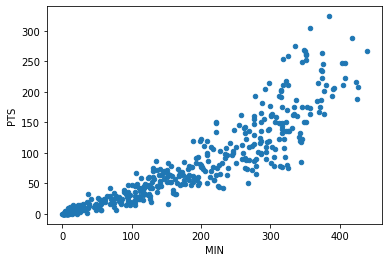

In [46]:
#POINTS vs MINUTES
df.plot(x ='MIN', y='PTS', kind = 'scatter')